In [76]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [75]:
def hist_norm(source, template):

    olddtype = source.dtype
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)
    interp_t_values = interp_t_values.astype(olddtype)

    return interp_t_values[bin_idx].reshape(oldshape)

In [79]:
img_path = './query_img/SRC_55.s0001f000861-2.jpeg'#SRC_61.s0001f000502_32.jpg'#
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img_ref = cv2.imread('./image_pair/2/23.s0001f000842.jpg')
ref_gray = cv2.cvtColor(img_ref,cv2.COLOR_RGB2GRAY)

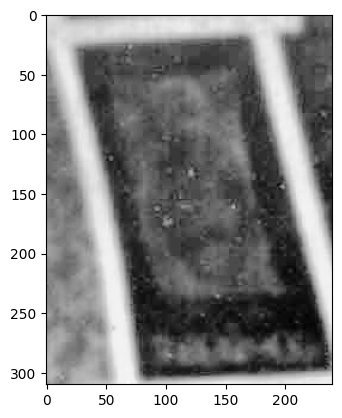

In [80]:
new_img = hist_norm(img_gray, ref_gray)
plt.imshow(new_img, cmap="gray")

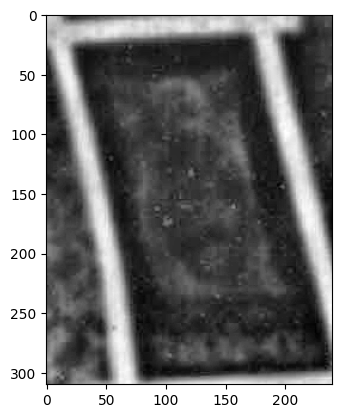

In [73]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clache = clahe.apply(img_gray)
plt.imshow(img_clache, cmap="gray")

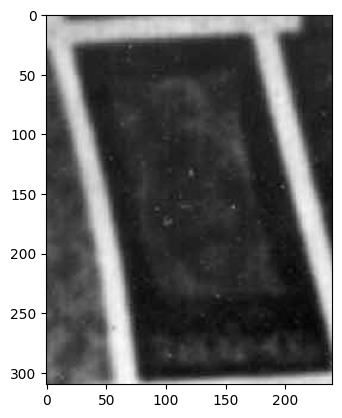

In [56]:
plt.imshow(img_gray, cmap="gray")

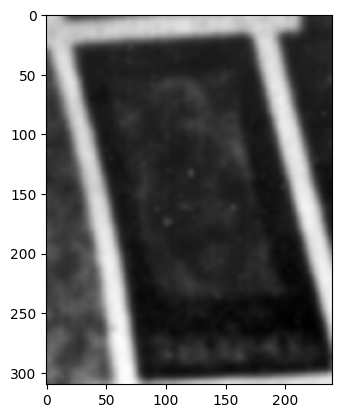

In [82]:
noise_removal = cv2.bilateralFilter(img_clache,9,75,75)
blurred = cv2.GaussianBlur(img_gray, (9, 9), 0)
plt.imshow(blurred, cmap="gray")

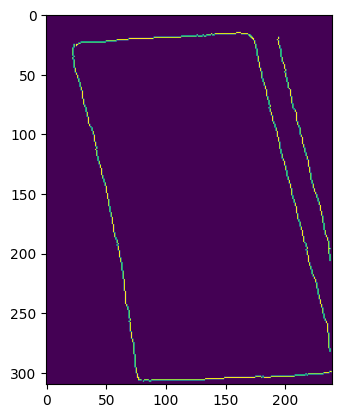

In [83]:
#ret,thresh_image = cv2.threshold(noise_removal,220,255,cv2.THRESH_OTSU)
#th = cv2.adaptiveThreshold(noise_removal, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
#plt.imshow(th)
edge = cv2.Canny(blurred, 75, 125)
plt.imshow(edge)

7


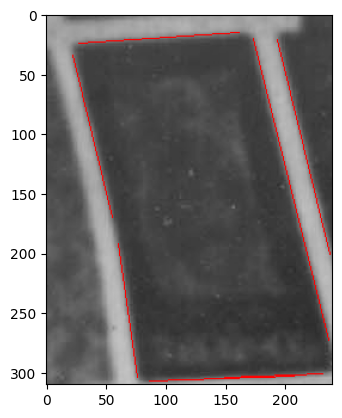

In [108]:
lines = cv2.HoughLinesP(edge,1,np.pi/180,60,minLineLength=30,maxLineGap=30)
i = 0
img = cv2.imread(img_path)
for line in lines:
    for x1,y1,x2,y2 in line:
        i+=1
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),1)
plt.imshow(img)
print(i)

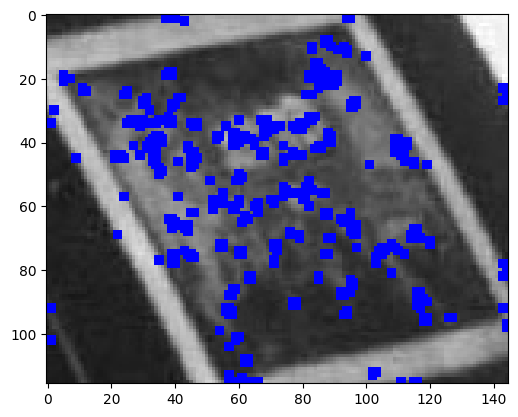

In [34]:
dst = cv2.cornerHarris(edge,2,3,0.15)
 
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
 
# Threshold for an optimal value, it may vary depending on the image.
img = cv2.imread(img_path)
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img)

C:\Users\Brandon Le\AppData\Local\Temp\ipykernel_26620\3376392250.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


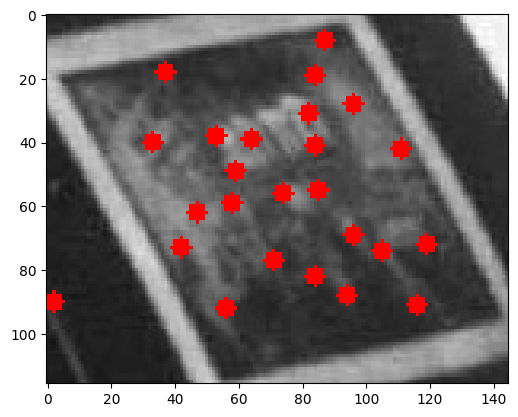

In [16]:
import numpy as np
corners = cv2.goodFeaturesToTrack(edge,25,0.01,10)
corners = np.int0(corners)
img = cv2.imread(img_path)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.imshow(img)

[[[  0   0]]

 [[ 26 309]]

 [[ 31  23]]

 [[172  19]]

 [[239 275]]

 [[212   0]]]


array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 77,  77,  77]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 77,  77,  77]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 76,  76,  76],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       ...,

       [[ 94,  94,  94],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [178, 178, 178],
        [180, 180, 180],
        [182, 182, 182]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [179, 179, 179],
        [180, 180, 180],
        [182, 182, 182]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [178, 178, 178],
        [181, 181, 181],
        [183, 183, 183]]

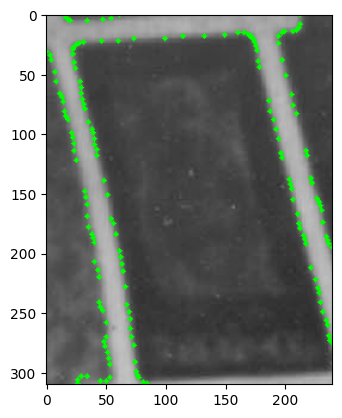

In [9]:
import numpy as np

img_path = './source/55.s0001f000861/55.s0001f000861-2.jpeg'#52.s0001f000858/52.s0001f000858-2.jpeg'#'#'#62.s0001f000503/62.s0001f000503_19.jpg
img = cv2.imread(img_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.bilateralFilter(gray, 9, 75, 75)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thresh)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
contour = contours[1]

cv2.drawContours(img, contours[1], -1, (0, 255, 0), 3) 
plt.imshow(img)

perimeter = cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, 0.05 * perimeter, True)

print(approx)

corner_pts = []
for i,point in enumerate(approx):
    x, y = point[0]
    corner_pts.append([x,y])
    cv2.circle(img, (x, y), 3, (0, 255, 0), -1)
cv2.drawContours(img, [approx], -1, (0, 255, 0))
#plt.imshow(img3)

In [47]:
mW = mH = 128
c_pts = np.array(corner_pts, np.float32)
dst = np.array([[0, 0],[0, mH - 1],[mW - 1, mH - 1],[mW - 1, 0]], np.float32)

M = cv2.getPerspectiveTransform(c_pts, dst)
 
img_trans = cv2.warpPerspective(img, M,(mW, mH))

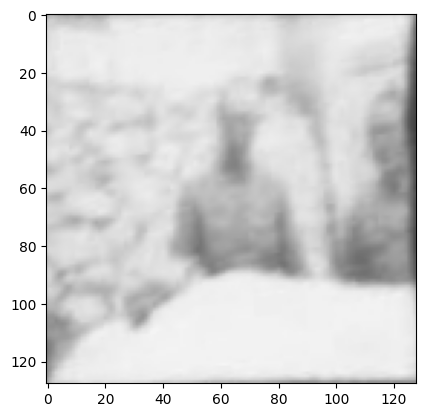

In [20]:
plt.imshow(img_trans)